# DS-SF-34 | 09 | Linear Regression, Part 3 | Codealong | Starter Code

In [2]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

## Part A | Model Fit and Customer Retention

In [5]:
train_df = pd.DataFrame({'t': range(8),
                         'survival_rate': [1., .869, .743, .653, .593, .551, .517, .491]},
                       columns = ['t', 'survival_rate'])

train_df

,t,survival_rate
0,0,1.000
1,1,0.869
2,2,0.743
3,3,0.653
4,4,0.593
5,5,0.551
6,6,0.517
7,7,0.491


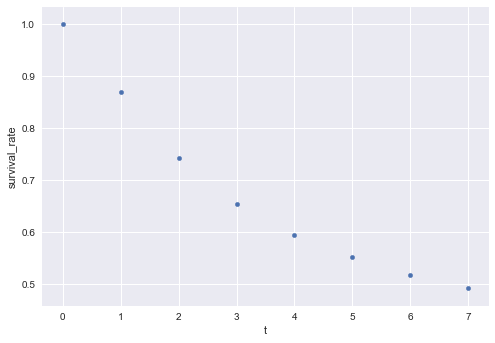

In [25]:
train_df.plot(kind = 'scatter', x = 't', y = 'survival_rate')

In [86]:
model = smf.ols(formula = 'survival_rate ~ t', data = train_df). fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          survival_rate   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     70.91
Date:                Mon, 15 May 2017   Prob (F-statistic):           0.000153
Time:                        19:30:23   Log-Likelihood:                 13.061
No. Observations:                   8   AIC:                            -22.12
Df Residuals:                       6   BIC:                            -21.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9254      0.035     26.258      0.000         0.839     1.012
t             -0.0709      0.008     -8.421      0.000        -0.092    -0.050
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.711
Skew:                           0.310   Prob(JB):                        0.701
Kurtosis:                       1.678   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
t_2 = train_df.sqrt(t)

model = smf.ols(formula = 'survival_rate ~ t + t_2', data = train_df). fit()
model.summary()

AttributeError: 'DataFrame' object has no attribute 'sqrt'

In [78]:
test_df = pd.DataFrame({'t': range(13),
                         'survival_rate': [1., .869, .743, .653, .593, .551, .517, .491,.468, .445, .427, .409, .3943]},
                       columns = ['t', 'survival_rate'])

test_df

,t,survival_rate
0,0,1.0000
1,1,0.8690
2,2,0.7430
3,3,0.6530
4,4,0.5930
5,5,0.5510
6,6,0.5170
7,7,0.4910
8,8,0.4680
9,9,0.4450


In [84]:
model = smf.ols(formula = 'survival_rate ~ t', data = test_df). fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          survival_rate   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     67.49
Date:                Mon, 15 May 2017   Prob (F-statistic):           5.07e-06
Time:                        19:29:22   Log-Likelihood:                 16.598
No. Observations:                  13   AIC:                            -29.20
Df Residuals:                      11   BIC:                            -28.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.8497      0.038     22.092      0.000         0.765     0.934
t             -0.0447      0.005     -8.215      0.000        -0.057    -0.033
==============================================================================
Omnibus:                        1.775   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.184
Skew:                           0.702   Prob(JB):                        0.553
Kurtosis:                       2.535   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
def retention_rate(x):
    x = x(-0.0709) + 0.9254
    return x

print retention_rate(3)

TypeError: 'int' object is not callable

## Part B | One-Hot Encoding for Categorical Variables and SF Housing

In [87]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-09-zillow.csv'), index_col = 'ID')

In [88]:
df.drop(df[df.IsAStudio == 1].index, inplace = True)

In [89]:
smf.ols(formula = 'SalePrice ~ Baths', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     146.6
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.94e-31
Time:                        20:28:26   Log-Likelihood:                -1690.7
No. Observations:                 929   AIC:                             3385.
Df Residuals:                     927   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3401      0.099      3.434      0.001         0.146     0.535
Baths          0.5242      0.043     12.109      0.000         0.439     0.609
==============================================================================
Omnibus:                     1692.623   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2167434.305
Skew:                          12.317   Prob(JB):                         0.00
Kurtosis:                     238.345   Cond. No.                         5.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### What's the bathrooms' distribution in the dataset?

In [90]:
df = df[df.Baths.isin([1, 2, 3, 4])]

In [91]:
# TODO
df.Baths.value_counts(dropna = False).sort_index()

1.0    333
2.0    323
3.0    105
4.0     33
Name: Baths, dtype: int64

In [92]:
baths_df = pd.get_dummies(df.Baths, prefix = 'Bath')

In [93]:
baths_df

,Bath_1.0,Bath_2.0,Bath_3.0,Bath_4.0
ID,,,,
15063505,0,1,0,0
15064044,1,0,0,0
15064257,0,1,0,0
15064295,0,1,0,0
15064391,1,0,0,0
15064536,0,1,0,0
15064669,0,0,1,0
15065032,1,0,0,0
15065140,1,0,0,0


In [98]:
baths_df.rename(columns = {'Bath_1.0': 'Bath_1',
    'Bath_2.0': 'Bath_2',
    'Bath_3.0': 'Bath_3',
    'Bath_4.0': 'Bath_4'}, inplace = True)

In [114]:
model = smf.ols(formula = 'SalePrice ~ Bath_2 + Bath_3 + Bath_4', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.49e-07
Time:                        20:46:59   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9914      0.070     14.249      0.000         0.855     1.128
Bath_2         0.2831      0.099      2.855      0.004         0.088     0.478
Bath_3         0.4808      0.142      3.383      0.001         0.202     0.760
Bath_4         1.2120      0.232      5.231      0.000         0.757     1.667
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         5.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
model = smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_3 + Bath_4', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.49e-07
Time:                        20:47:09   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2745      0.071     18.040      0.000         1.136     1.413
Bath_1        -0.2831      0.099     -2.855      0.004        -0.478    -0.088
Bath_3         0.1977      0.143      1.386      0.166        -0.082     0.478
Bath_4         0.9290      0.232      4.003      0.000         0.473     1.384
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model = smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_3 + Bath_4', data=df).fit()
model.summary()

In [99]:
baths_df


,Bath_1,Bath_2,Bath_3,Bath_4
ID,,,,
15063505,0,1,0,0
15064044,1,0,0,0
15064257,0,1,0,0
15064295,0,1,0,0
15064391,1,0,0,0
15064536,0,1,0,0
15064669,0,0,1,0
15065032,1,0,0,0
15065140,1,0,0,0


In [100]:
baths_df.rename(columns = {'Bath_1.0': 'Bath_1',
    'Bath_2.0': 'Bath_2',
    'Bath_3.0': 'Bath_3',
    'Bath_4.0': 'Bath_4'}, inplace = True)

In [101]:
baths_df

,Bath_1,Bath_2,Bath_3,Bath_4
ID,,,,
15063505,0,1,0,0
15064044,1,0,0,0
15064257,0,1,0,0
15064295,0,1,0,0
15064391,1,0,0,0
15064536,0,1,0,0
15064669,0,0,1,0
15065032,1,0,0,0
15065140,1,0,0,0


In [102]:
df = df.join([baths_df])

In [111]:
df.columns

Index([u'Address', u'DateOfSale', u'SalePrice', u'IsAStudio', u'Beds',
       u'Baths', u'Size', u'LotSize', u'BuiltInYear', u'Bath_1', u'Bath_2',
       u'Bath_3', u'Bath_4'],
      dtype='object')

> ### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [ ]:
# TODO

> ### Let's use `pandas`'s `get_dummies` to create a one-hot encoding of the `Bath` categorical feature

In [106]:
# TODO
pd.get_dummies([1,2,3,4,3,2,1,99])

,1,2,3,4,99
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,1,0,0
5,0,1,0,0,0
6,1,0,0,0,0
7,0,0,0,0,1


In [107]:
baths_df

,Bath_1,Bath_2,Bath_3,Bath_4
ID,,,,
15063505,0,1,0,0
15064044,1,0,0,0
15064257,0,1,0,0
15064295,0,1,0,0
15064391,1,0,0,0
15064536,0,1,0,0
15064669,0,0,1,0
15065032,1,0,0,0
15065140,1,0,0,0


In [108]:
baths_df.rename(columns = {'Bath_1.0': 'Bath_1',
    'Bath_2.0': 'Bath_2',
    'Bath_3.0': 'Bath_3',
    'Bath_4.0': 'Bath_4'}, inplace = True)

In [109]:
baths_df

,Bath_1,Bath_2,Bath_3,Bath_4
ID,,,,
15063505,0,1,0,0
15064044,1,0,0,0
15064257,0,1,0,0
15064295,0,1,0,0
15064391,1,0,0,0
15064536,0,1,0,0
15064669,0,0,1,0
15065032,1,0,0,0
15065140,1,0,0,0


In [110]:
df = df.join([baths_df])

ValueError: Indexes have overlapping values: ['Bath_1', 'Bath_2', 'Bath_3', 'Bath_4']

In [ ]:
df.columns

### Activity | Linear modeling using `Bath`'s one-hot encoding

> ### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [ ]:
# TODO

## Part C | The Adverstising Dataset

In [116]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-09-advertising.csv'))

In [117]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


### Plots

> ### Sales ~ TV

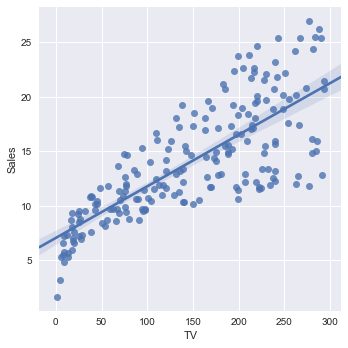

In [118]:
sns.lmplot(x = 'TV', y = 'Sales', data = df)

In [ ]:
model = smf.ols(formula = 'Sales ~ TV +', data = df).fit()

model.summary()

> ### Sales ~ Radio

In [ ]:
sns.lmplot(x = 'Radio', y = 'Sales', data = df)

> ### Sales ~ Newspaper

In [ ]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data = df)

### Simple linear regressions

> ### Sales ~ TV

In [ ]:
model_tv = smf.ols(formula = 'Sales ~ TV', data = df).fit()

model_tv.summary()

> ### Sales ~ Radio

In [ ]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data = df).fit()

model_radio.summary()

> ### Sales ~ Newspaper

In [ ]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()

model_newspaper.summary()

### Residuals

> ### Sales ~ TV

In [ ]:
sm.qqplot(model_tv.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_tv, 'TV')

pass

> ### Sales ~ Radio

In [ ]:
sm.qqplot(model_radio.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_radio, 'Radio')

pass

> ### Sales ~ Newspaper

In [ ]:
sm.qqplot(model_newspaper.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_newspaper, 'Newspaper')

pass

> ### Sales ~ TV + Radio + Newspaper

In [ ]:
# TODO

model.summary()

> ### Sales ~ TV + Radio

In [ ]:
# TODO

model.summary()

In [ ]:
sm.qqplot(model.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

## Part D | Interaction Effects and Advertising

### Sales ~ TV + Radio + TV * Radio

In [119]:
model = smf.ols(formula = 'Sales ~ TV + Radio + TV * Radio', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1934.
Date:                Mon, 15 May 2017   Prob (F-statistic):          3.19e-144
Time:                        21:10:50   Log-Likelihood:                -267.07
No. Observations:                 198   AIC:                             542.1
Df Residuals:                     194   BIC:                             555.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7577      0.247     27.304      0.000         6.270     7.246
TV             0.0190      0.002     12.682      0.000         0.016     0.022
Radio          0.0276      0.009      3.089      0.002         0.010     0.045
TV:Radio       0.0011   5.27e-05     20.817      0.000         0.001     0.001
==============================================================================
Omnibus:                      126.182   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.060
Skew:                          -2.306   Prob(JB):                    1.12e-250
Kurtosis:                      13.875   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

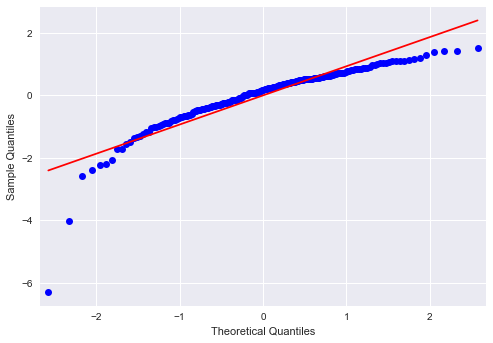

In [120]:
sm.qqplot(model.resid, line = 's')

pass

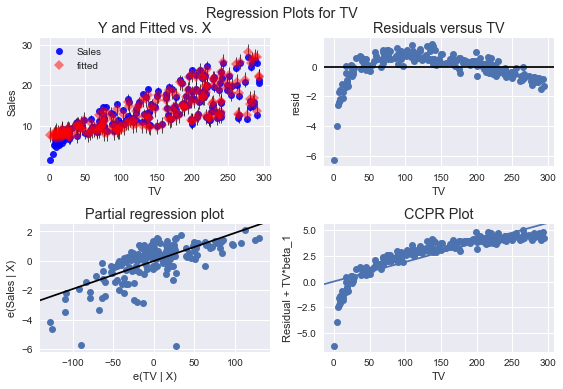

In [121]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

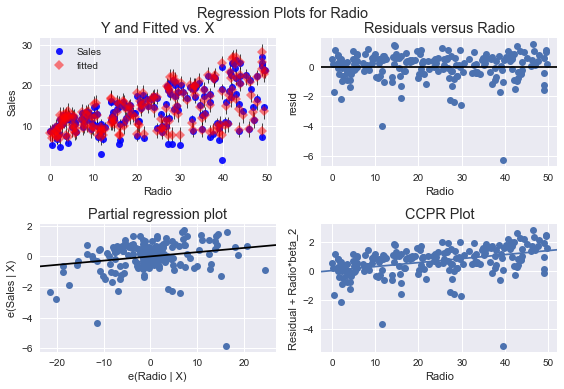

In [122]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

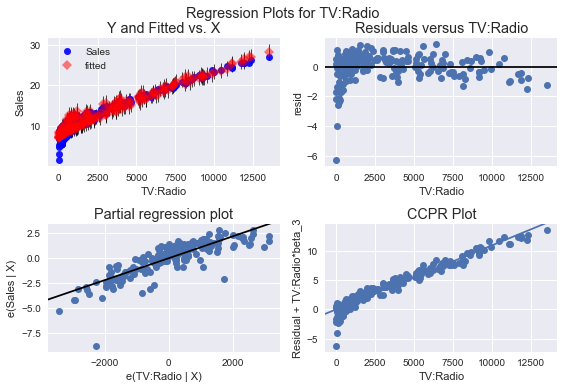

In [123]:
sm.graphics.plot_regress_exog(model, 'TV:Radio')

pass